# <center>**EDA, Feature Engineering and Regession Model Analysis on Yello Taxi Dataset**

# **To Reproduce the notebook**
### Make sure the following are installed
### notebook - for working with jupyter notebooks 
### ipykernel - (incase this notebook requirements would interfere with you current requirements for other projects) 
### pandas - for working with opeing and manipilating csv and excell files as tales
### numpy - for data manilulations, sort of python arrays
### matplotlib - for ploting data as graphs
### seaborn - also for ploting data
### sklearn - python scientific library for models, metrices and data cleaning

In [51]:
# start by importing system level libraries
from datetime import date, datetime, timedelta 

# importing system level libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import sklearn.metrics as metrics # For confusion matrix

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

# custom libararies here if any

# **About the dataset**
#### Yellow Taxi trip records are compiled from submissions made by Technology Service Providers (TSPs). Each entry corresponds to a single trip taken in a yellow taxi, encompassing details such as pick-up and drop-off times, locations, distances traveled, fare breakdowns, rate and payment types, and passenger counts reported by drivers. The original dataset is about 10Gb but in this notebook we will work with the first 100k records, which is roughly 80mbs. The url to the dataet and description are found here: data -> https://data.cityofnewyork.us/Transportation/2017-Yellow-Taxi-Trip-Data/biws-g3hs/data, description -> https://data.cityofnewyork.us/Transportation/2017-Yellow-Taxi-Trip-Data/biws-g3hs/about_data

# **EDA (Exploring and Analysing the data)**
# Good moels are made by having good quality data, that is why this step is very important, so that we understand how our data looks like and if its relevant. Actually, depedning on the data, we will choose a model that best works for such a data

In [2]:
# read the data and visualize the first 10 rows
df0 = pd.read_csv('yello_taxi_data.csv')
df0.head(10)

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2     11/21/2017 12:56      11/21/2017 13:12                1   
1         1     11/21/2017 12:31      11/21/2017 12:54                2   
2         1     11/21/2017 12:15      11/21/2017 12:27                1   
3         1     11/21/2017 12:38      11/21/2017 12:46                1   
4         1     11/21/2017 12:48      11/21/2017 12:54                1   
5         2     11/21/2017 12:25      11/21/2017 12:29                1   
6         2     11/21/2017 12:31      11/21/2017 12:41                1   
7         2     11/21/2017 12:56      11/21/2017 13:09                1   
8         1     11/21/2017 12:18      11/21/2017 12:35                3   
9         1     11/21/2017 12:44      11/21/2017 12:57                2   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           1.76           1                  N           211           164   
1           5.00           1                  N            87           162   
2           1.20           1                  N           163           142   
3           0.80           1                  N           239           238   
4           0.90           1                  N           238           142   
5           0.37           1                  N           170           161   
6           0.90           1                  N           161           237   
7           1.08           1                  N           161           170   
8           1.40           1                  N           237           229   
9           0.80           1                  N           233           161   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             2         11.5    0.0      0.5        0.00           0.0   
1             1         20.5    0.0      0.5        4.25           0.0   
2             1          9.0    0.0      0.5        1.95           0.0   
3             1          7.0    0.0      0.5        1.55           0.0   
4             1          6.0    0.0      0.5        1.36           0.0   
5             1          4.5    0.0      0.5        1.32           0.0   
6             1          7.5    0.0      0.5        1.00           0.0   
7             1          9.0    0.0      0.5        1.00           0.0   
8             1         11.5    0.0      0.5        2.45           0.0   
9             1          8.5    0.0      0.5        2.30           0.0   

   improvement_surcharge  total_amount  
0                    0.3         12.30  
1                    0.3         25.55  
2                    0.3         11.75  
3                    0.3          9.35  
4                    0.3          8.16  
5                    0.3          6.62  
6                    0.3          9.30  
7                    0.3         10.80  
8                    0.3         14.75  
9                    0.3         11.60

In [3]:
 # # check dataset's shape
print(df.shape)
 
# check  the columns we have in the dataset and the data types
df.info()



(1048575, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 17 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   VendorID               1048575 non-null  int64  
 1   tpep_pickup_datetime   1048575 non-null  object 
 2   tpep_dropoff_datetime  1048575 non-null  object 
 3   passenger_count        1048575 non-null  int64  
 4   trip_distance          1048575 non-null  float64
 5   RatecodeID             1048575 non-null  int64  
 6   store_and_fwd_flag     1048575 non-null  object 
 7   PULocationID           1048575 non-null  int64  
 8   DOLocationID           1048575 non-null  int64  
 9   payment_type           1048575 non-null  int64  
 10  fare_amount            1048575 non-null  float64
 11  extra                  1048575 non-null  float64
 12  mta_tax                1048575 non-null  float64
 13  tip_amount             1048575 non-null  float64
 14  toll

In [4]:
# Check for missing data and duplicates using .isna() and .drop_duplicates()

# Check for duplicates 
print('Shape of dataframe without duplicates:',
      df.drop_duplicates().shape)

# Check for missing values in dataframe
print('missing values count:', df.isna().sum().sum())

# missing values per column
print('Missing values per column:')
df.isna().sum()


Shape of dataframe: (1048575, 17)
Shape of dataframe with duplicates dropped: (1048516, 17)
Total count of missing values: 0
Missing values per column:


VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64

In [5]:
# stats about the data
df.describe()


VendorID  passenger_count  trip_distance    RatecodeID  \
count  1.048575e+06     1.048575e+06   1.048575e+06  1.048575e+06   
mean   1.559211e+00     1.663500e+00   2.842899e+00  1.040037e+00   
std    4.964819e-01     1.278677e+00   3.667040e+00  3.303689e-01   
min    1.000000e+00     0.000000e+00   0.000000e+00  1.000000e+00   
25%    1.000000e+00     1.000000e+00   9.600000e-01  1.000000e+00   
50%    2.000000e+00     1.000000e+00   1.600000e+00  1.000000e+00   
75%    2.000000e+00     2.000000e+00   2.960000e+00  1.000000e+00   
max    2.000000e+00     9.000000e+00   3.865800e+02  9.900000e+01   

       PULocationID  DOLocationID  payment_type   fare_amount         extra  \
count  1.048575e+06  1.048575e+06  1.048575e+06  1.048575e+06  1.048575e+06   
mean   1.637744e+02  1.613085e+02  1.395208e+00  1.257202e+01  3.441722e-01   
std    6.668935e+01  7.067580e+01  5.094582e-01  1.361869e+01  4.721913e-01   
min    1.000000e+00  1.000000e+00  1.000000e+00 -1.500000e+02 -4.500000e+00   
25%    1.140000e+02  1.070000e+02  1.000000e+00  6.500000e+00  0.000000e+00   
50%    1.620000e+02  1.620000e+02  1.000000e+00  9.000000e+00  0.000000e+00   
75%    2.330000e+02  2.330000e+02  2.000000e+00  1.400000e+01  5.000000e-01   
max    2.650000e+02  2.650000e+02  4.000000e+00  8.006000e+03  6.520000e+00   

            mta_tax    tip_amount  tolls_amount  improvement_surcharge  \
count  1.048575e+06  1.048575e+06  1.048575e+06           1.048575e+06   
mean   4.974025e-01  1.624659e+00  3.055308e-01           2.996369e-01   
std    3.916966e-02  2.491698e+00  1.950313e+00           1.399357e-02   
min   -5.000000e-01 -1.706000e+01 -5.760000e+00          -3.000000e-01   
25%    5.000000e-01  0.000000e+00  0.000000e+00           3.000000e-01   
50%    5.000000e-01  1.060000e+00  0.000000e+00           3.000000e-01   
75%    5.000000e-01  2.200000e+00  0.000000e+00           3.000000e-01   
max    3.450000e+00  4.400000e+02  8.285200e+02           3.000000e-01   

       total_amount  
count  1.048575e+06  
mean   1.564580e+01  
std    1.577748e+01  
min   -1.508000e+02  
25%    8.300000e+00  
50%    1.130000e+01  
75%    1.716000e+01  
max    8.006800e+03

In [6]:
# format of the data in the dataset
df['tpep_dropoff_datetime'][0]


'11/21/2017 13:12'

In [7]:
# Convert datetime columns to datetime
# Display data types of `tpep_pickup_datetime`, `tpep_dropoff_datetime`
print('Dtype of tpep_pickup_datetime:', df['tpep_pickup_datetime'].dtype)
print('Dtype of tpep_dropoff_datetime:',
df['tpep_dropoff_datetime'].dtype)

# Convert `tpep_pickup_datetime` to datetime format
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'],
format='%m/%d/%Y %H:%M')

# Convert `tpep_dropoff_datetime` to datetime format
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'],
format='%m/%d/%Y %H:%M')

# Display data types of `tpep_pickup_datetime`, `tpep_dropoff_datetime`
print('Dtype for tpep_pickup_datetime:', df['tpep_pickup_datetime'].dtype)
print('Dtype of tpep_dropoff_datetime:',
df['tpep_dropoff_datetime'].dtype)
df.head(3)

Data type of tpep_pickup_datetime: object
Data type of tpep_dropoff_datetime: object
Data type of tpep_pickup_datetime: datetime64[ns]
Data type of tpep_dropoff_datetime: datetime64[ns]


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2017-11-21 12:56:00   2017-11-21 13:12:00                1   
1         1  2017-11-21 12:31:00   2017-11-21 12:54:00                2   
2         1  2017-11-21 12:15:00   2017-11-21 12:27:00                1   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           1.76           1                  N           211           164   
1           5.00           1                  N            87           162   
2           1.20           1                  N           163           142   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             2         11.5    0.0      0.5        0.00           0.0   
1             1         20.5    0.0      0.5        4.25           0.0   
2             1          9.0    0.0      0.5        1.95           0.0   

   improvement_surcharge  total_amount  
0                    0.3         12.30  
1                    0.3         25.55  
2                    0.3         11.75

In [8]:
# Create `duration` column
df['duration'] = (df['tpep_dropoff_datetime'] -
df['tpep_pickup_datetime'])/np.timedelta64(1,'m')


In [9]:
# check for outliers if any
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 18 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   VendorID               1048575 non-null  int64         
 1   tpep_pickup_datetime   1048575 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  1048575 non-null  datetime64[ns]
 3   passenger_count        1048575 non-null  int64         
 4   trip_distance          1048575 non-null  float64       
 5   RatecodeID             1048575 non-null  int64         
 6   store_and_fwd_flag     1048575 non-null  object        
 7   PULocationID           1048575 non-null  int64         
 8   DOLocationID           1048575 non-null  int64         
 9   payment_type           1048575 non-null  int64         
 10  fare_amount            1048575 non-null  float64       
 11  extra                  1048575 non-null  float64       
 12  mta_tax                10485

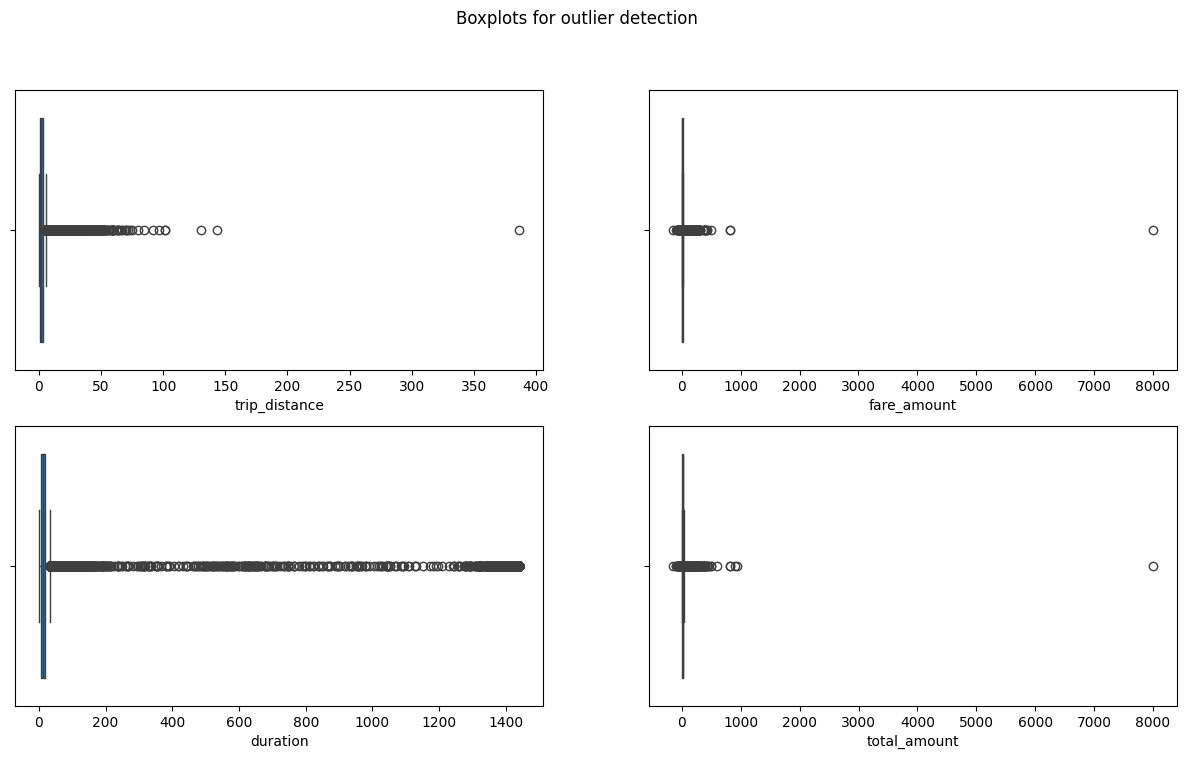

In [10]:
# we plot 2 by 2 plots to see whcih amonst the data points has extreme values

fig, axes = plt.subplots(2, 2, figsize=(15, 8))
fig.suptitle('Boxplots for outlier detection')
sns.boxplot(ax=axes[0][0], x=df['trip_distance'])
sns.boxplot(ax=axes[0][1], x=df['fare_amount'])
sns.boxplot(ax=axes[1][0], x=df['duration'])
sns.boxplot(ax=axes[1][1], x=df['total_amount'])
plt.show();

In [11]:

# Check if trip distances are rounded down or its bad data
sorted(set(df['trip_distance']))[:10]


[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]

In [12]:
#calculate the count of rides
sum(df['trip_distance']==0)

6702

In [13]:
#Check total amount
df['total_amount'].describe()


count    1.048575e+06
mean     1.564580e+01
std      1.577748e+01
min     -1.508000e+02
25%      8.300000e+00
50%      1.130000e+01
75%      1.716000e+01
max      8.006800e+03
Name: total_amount, dtype: float64

In [15]:
# Impute values less than $0 with 0
df.loc[df['total_amount'] < 0, 'total_amount'] = 0
df['total_amount'].min()


0.0

In [16]:
def outlier_imputer(column_list, iqr_factor):

#Impute upper-limit values in specified columns based on their
#interquartile range.
#Arguments:
#column_list: A list of columns to iterate over
#iqr_factor: A number representing x in the formula:
#Q3 + (x * IQR). Used to determine maximum threshold,
#beyond which a point is considered an outlier.
#The IQR is computed for each column in column_list and values exceeding
#the upper threshold for each column are imputed with the upper threshold
#value. 
    for col in column_list:
        # Reassign minimum to zero
        df.loc[df[col] < 0, col] = 0
        # Calculate upper threshold
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        upper_threshold = q3 + (iqr_factor * iqr)
        print(col)
        print('q3:', q3)
        print('upper_threshold:', upper_threshold)
        # Reassign values > threshold to threshold
        df.loc[df[col] > upper_threshold, col] = upper_threshold
        print(df[col].describe())
        print()

In [17]:
outlier_imputer(['total_amount'], 6)


total_amount
q3: 17.16
upper_threshold: 70.32
count    1.048575e+06
mean     1.548032e+01
std      1.250890e+01
min      0.000000e+00
25%      8.300000e+00
50%      1.130000e+01
75%      1.716000e+01
max      7.032000e+01
Name: total_amount, dtype: float64



In [18]:
df['duration'].describe()

count    1.048575e+06
mean     1.666761e+01
std      6.597617e+01
min      0.000000e+00
25%      6.000000e+00
50%      1.100000e+01
75%      1.700000e+01
max      1.440000e+03
Name: duration, dtype: float64

In [19]:
# Impute a 0 for any negative values
df.loc[df['duration'] < 0, 'duration'] = 0
df['duration'].min()

0.0

In [20]:
# Create `pickup_dropoff` column
df['pickup_dropoff'] = df['PULocationID'].astype(str) + ' ' + df['DOLocationID'].astype(str)
df['pickup_dropoff'].head(2)

0    211 164
1     87 162
Name: pickup_dropoff, dtype: object

In [21]:
grouped = df.groupby('pickup_dropoff').mean(numeric_only=True)[['trip_distance']] 
grouped[:5]

trip_distance
pickup_dropoff               
1 1                  1.395479
1 148               14.800000
1 236               29.200000
1 264                0.000000
1 265                6.075000

In [22]:
# 1. Convert `grouped` to a dictionary
grouped_dict = grouped.to_dict()

# 2. Reassign to only contain the inner dictionary
grouped_dict = grouped_dict['trip_distance']

In [23]:
# 1. Create a mean_distance column that is a copy of the pickup_dropoff helper column
df['mean_distance'] = df['pickup_dropoff']

# 2. Map `grouped_dict` to the `mean_distance` column
df['mean_distance'] = df['mean_distance'].map(grouped_dict)

# Confirm that it worked
df[(df['PULocationID']==100) & (df['DOLocationID']==231)][['mean_distance']]


mean_distance
361           3.434435
14738         3.434435
15303         3.434435
18948         3.434435
19987         3.434435
...                ...
1026599       3.434435
1028739       3.434435
1031113       3.434435
1037566       3.434435
1045095       3.434435

[248 rows x 1 columns]

In [24]:
grouped = df.groupby('pickup_dropoff').mean(numeric_only=True)[['duration']]
grouped

# Create a dictionary where keys are unique pickup_dropoffs and values are
# mean trip duration for all trips with those pickup_dropoff combos
grouped_dict = grouped.to_dict()
grouped_dict = grouped_dict['duration']
df['mean_duration'] = df['pickup_dropoff']
df['mean_duration'] = df['mean_duration'].map(grouped_dict)

# Confirm that it worked
df[(df['PULocationID']==100) & (df['DOLocationID']==231)][['mean_duration']]


mean_duration
361          18.495968
14738        18.495968
15303        18.495968
18948        18.495968
19987        18.495968
...                ...
1026599      18.495968
1028739      18.495968
1031113      18.495968
1037566      18.495968
1045095      18.495968

[248 rows x 1 columns]

In [25]:
# Create 'day' col
df['day'] = df['tpep_pickup_datetime'].dt.day_name().str.lower()

# Create 'month' col
df['month'] = df['tpep_pickup_datetime'].dt.strftime('%b').str.lower()


In [26]:
# Create 'rush_hour' col
df['rush_hour'] = df['tpep_pickup_datetime'].dt.hour

# If day is Saturday or Sunday, impute 0 in `rush_hour` column
df.loc[df['day'].isin(['saturday', 'sunday']), 'rush_hour'] = 0

In [27]:
def rush_hourizer(hour):
    if 6 <= hour['rush_hour'] < 10:
        val = 1
    elif 16 <= hour['rush_hour'] < 20:
        val = 1
    else:
        val = 0
    return val

In [28]:
# Apply the `rush_hourizer()` function to the new column
df.loc[(df.day != 'saturday') & (df.day != 'sunday'), 'rush_hour'] = df.apply(rush_hourizer, axis=1)
df.head()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_5240\3278249955.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0 0 0 ... 1 1 1]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df.loc[(df.day != 'saturday') & (df.day != 'sunday'), 'rush_hour'] = df.apply(rush_hourizer, axis=1)


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2017-11-21 12:56:00   2017-11-21 13:12:00                1   
1         1  2017-11-21 12:31:00   2017-11-21 12:54:00                2   
2         1  2017-11-21 12:15:00   2017-11-21 12:27:00                1   
3         1  2017-11-21 12:38:00   2017-11-21 12:46:00                1   
4         1  2017-11-21 12:48:00   2017-11-21 12:54:00                1   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           1.76           1                  N           211           164   
1           5.00           1                  N            87           162   
2           1.20           1                  N           163           142   
3           0.80           1                  N           239           238   
4           0.90           1                  N           238           142   

   payment_type  ...  tolls_amount  improvement_surcharge  total_amount  \
0             2  ...           0.0                    0.3         12.30   
1             1  ...           0.0                    0.3         25.55   
2             1  ...           0.0                    0.3         11.75   
3             1  ...           0.0                    0.3          9.35   
4             1  ...           0.0                    0.3          8.16   

   duration  pickup_dropoff  mean_distance  mean_duration      day month  \
0      16.0         211 164       2.257463      20.455224  tuesday   nov   
1      23.0          87 162       5.263463      26.341463  tuesday   nov   
2      12.0         163 142       0.986704      11.774876  tuesday   nov   
3       8.0         239 238       0.829484       6.348383  tuesday   nov   
4       6.0         238 142       1.393416      13.257881  tuesday   nov   

   rush_hour  
0          0  
1          0  
2          0  
3          0  
4          0  

[5 rows x 24 columns]

In [30]:
# Create a scatter plot of duration and trip_distance, with a line of best fit

# for time, lets use the first 500 to plot, I however have tested on all df and works, you can try same
df_plot = df.head(500)
sns.set(style='whitegrid')
f = plt.figure()
f.set_figwidth(5)
f.set_figheight(5)
sns.regplot(x=df_plot['mean_duration'], y=df_plot['total_amount'],
scatter_kws={'alpha':0.5, 's':5},
line_kws={'color':'red'})
plt.ylim(0, 70)
plt.xlim(0, 70)
plt.title('Mean duration x total_amount')
plt.show()

In [31]:
df[df['total_amount'] > 50]['total_amount'].value_counts().head()


total_amount
70.32    8512
58.56    5254
70.27    2883
52.80    1875
70.26    1475
Name: count, dtype: int64

In [32]:
# Set pandas to display all columns
pd.set_option('display.max_columns', None)
df[df['total_amount']==52].head(10)

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
12448          2  2017-11-21 13:43:00   2017-11-21 14:47:00                5   
32341          2  2017-11-21 14:50:00   2017-11-21 16:00:00                5   
52262          1  2017-11-21 15:53:00   2017-11-21 16:40:00                1   
102421         1  2017-11-21 18:07:00   2017-11-21 18:53:00                1   
106219         2  2017-11-21 18:59:00   2017-11-21 19:38:00                1   
375594         1  2017-11-22 16:32:00   2017-11-22 17:40:00                1   
452556         1  2017-11-22 21:46:00   2017-11-22 22:29:00                1   
847600         2  2017-11-24 20:03:00   2017-11-24 20:27:00                2   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
12448           13.30           1                  N           138   
32341            7.93           1                  N            68   
52262           10.00           1                  N           138   
102421          11.10           1                  N           138   
106219          15.47           1                  N           132   
375594          10.70           1                  N           138   
452556          14.60           1                  N           264   
847600          14.58           1                  N           162   

        DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
12448             89             1         47.5    0.0      0.5        3.70   
32341             36             1         43.0    0.0      0.5        8.20   
52262             79             1         36.0    1.0      0.5        8.44   
102421           137             1         37.5    1.0      0.5        6.94   
106219           112             1         43.5    1.0      0.5        6.70   
375594           211             1         46.0    1.0      0.5        4.20   
452556           264             1         46.5    0.5      0.5        4.20   
847600            16             1         39.5    0.5      0.5        5.44   

        tolls_amount  improvement_surcharge  total_amount  duration  \
12448           0.00                    0.3          52.0      64.0   
32341           0.00                    0.3          52.0      70.0   
52262           5.76                    0.3          52.0      47.0   
102421          5.76                    0.3          52.0      46.0   
106219          0.00                    0.3          52.0      39.0   
375594          0.00                    0.3          52.0      68.0   
452556          0.00                    0.3          52.0      43.0   
847600          5.76                    0.3          52.0      24.0   

       pickup_dropoff  mean_distance  mean_duration        day month  \
12448          138 89      15.680973      43.858407    tuesday   nov   
32341           68 36       8.041818      39.090909    tuesday   nov   
52262          138 79      10.575755      33.273504    tuesday   nov   
102421        138 137       9.332067      25.150838    tuesday   nov   
106219        132 112      16.084650      42.175000    tuesday   nov   
375594        138 211      11.644576      40.584746  wednesday   nov   
452556        264 264       2.646834      15.898896  wednesday   nov   
847600         162 16      14.360000      45.333333     friday   nov   

        rush_hour  
12448           0  
32341           0  
52262           0  
102421          1  
106219          1  
375594          1  
452556          0  
847600          0

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 24 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   VendorID               1048575 non-null  int64         
 1   tpep_pickup_datetime   1048575 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  1048575 non-null  datetime64[ns]
 3   passenger_count        1048575 non-null  int64         
 4   trip_distance          1048575 non-null  float64       
 5   RatecodeID             1048575 non-null  int64         
 6   store_and_fwd_flag     1048575 non-null  object        
 7   PULocationID           1048575 non-null  int64         
 8   DOLocationID           1048575 non-null  int64         
 9   payment_type           1048575 non-null  int64         
 10  fare_amount            1048575 non-null  float64       
 11  extra                  1048575 non-null  float64       
 12  mta_tax                10485

In [34]:
df2 = df.copy()
df2 = df2.drop(['tpep_dropoff_datetime',
'tpep_pickup_datetime',
'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
'PULocationID', 'DOLocationID',
'payment_type', 'extra', 'mta_tax', 'tip_amount',
'tolls_amount', 'improvement_surcharge',
'tpep_dropoff_datetime',
'tpep_pickup_datetime', 'duration',
'pickup_dropoff', 'day', 'month'], axis=1)
df2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 7 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   VendorID         1048575 non-null  int64  
 1   passenger_count  1048575 non-null  int64  
 2   fare_amount      1048575 non-null  float64
 3   total_amount     1048575 non-null  float64
 4   mean_distance    1048575 non-null  float64
 5   mean_duration    1048575 non-null  float64
 6   rush_hour        1048575 non-null  int64  
dtypes: float64(4), int64(3)
memory usage: 56.0 MB


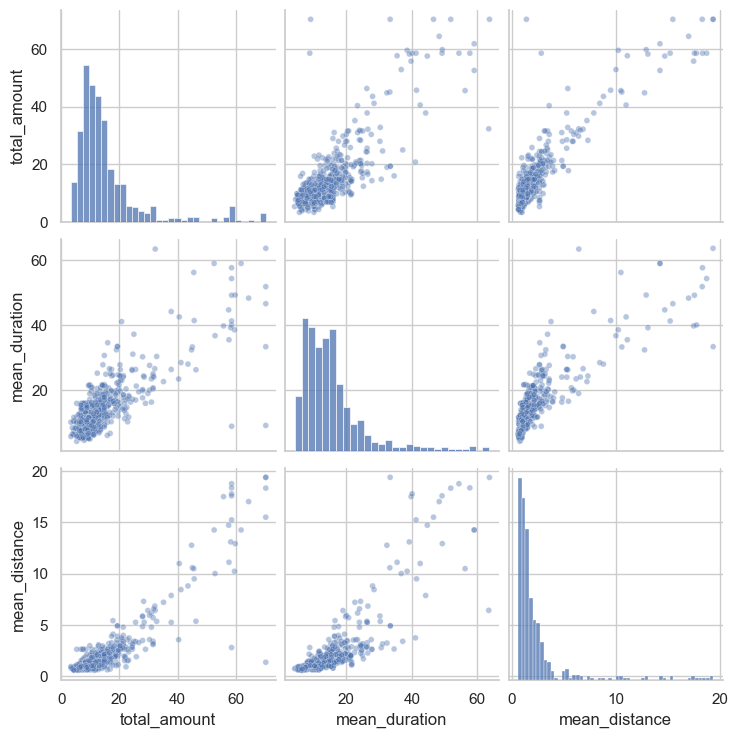

In [35]:
# Create a pairplot to visualize pairwise relationships between variables in the data 
# also lets plot the first 500
df_plot = df.head(500)
sns.pairplot(df_plot[['total_amount', 'mean_duration', 'mean_distance']],
plot_kws={'alpha':0.4, 'size':5},);

In [36]:
# Create correlation matrix containing pairwise correlation of columns, using pearson correlation coefficient
df2.corr(method='pearson')

VendorID  passenger_count  fare_amount  total_amount  \
VendorID         1.000000         0.218803     0.010802      0.014415   
passenger_count  0.218803         1.000000     0.008911      0.011111   
fare_amount      0.010802         0.008911     1.000000      0.780415   
total_amount     0.014415         0.011111     0.780415      1.000000   
mean_distance    0.015510         0.011421     0.713834      0.904281   
mean_duration    0.017302         0.016761     0.513023      0.649484   
rush_hour        0.003184        -0.008585    -0.006990      0.010225   

                 mean_distance  mean_duration  rush_hour  
VendorID              0.015510       0.017302   0.003184  
passenger_count       0.011421       0.016761  -0.008585  
fare_amount           0.713834       0.513023  -0.006990  
total_amount          0.904281       0.649484   0.010225  
mean_distance         1.000000       0.689294  -0.026022  
mean_duration         0.689294       1.000000  -0.023496  
rush_hour            -0.026022      -0.023496   1.000000

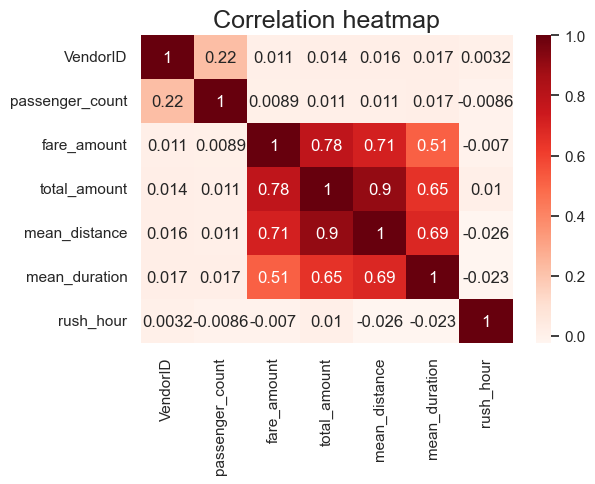

In [38]:
# Create correlation heatmap

df_plot = df.head(500)
plt.figure(figsize=(6,4))
sns.heatmap(df2.corr(method='pearson'), annot=True, cmap='Reds')
plt.title('Correlation heatmap',
fontsize=18)
plt.show()

In [39]:
df2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 7 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   VendorID         1048575 non-null  int64  
 1   passenger_count  1048575 non-null  int64  
 2   fare_amount      1048575 non-null  float64
 3   total_amount     1048575 non-null  float64
 4   mean_distance    1048575 non-null  float64
 5   mean_duration    1048575 non-null  float64
 6   rush_hour        1048575 non-null  int64  
dtypes: float64(4), int64(3)
memory usage: 56.0 MB


In [40]:
# Remove the target column from the features - total_amount
X = df2.drop(columns=['total_amount'])

# Set y variable
y = df2[['total_amount']]

# Display first few rows
X.head()

VendorID  passenger_count  fare_amount  mean_distance  mean_duration  \
0         2                1         11.5       2.257463      20.455224   
1         1                2         20.5       5.263463      26.341463   
2         1                1          9.0       0.986704      11.774876   
3         1                1          7.0       0.829484       6.348383   
4         1                1          6.0       1.393416      13.257881   

   rush_hour  
0          0  
1          0  
2          0  
3          0  
4          0

In [41]:
# Convert VendorID to string
X['VendorID'] = X['VendorID'].astype(str)
# Get dummies

X = pd.get_dummies(X, drop_first=True)
X.head()

passenger_count  fare_amount  mean_distance  mean_duration  rush_hour  \
0                1         11.5       2.257463      20.455224          0   
1                2         20.5       5.263463      26.341463          0   
2                1          9.0       0.986704      11.774876          0   
3                1          7.0       0.829484       6.348383          0   
4                1          6.0       1.393416      13.257881          0   

   VendorID_2  
0        True  
1       False  
2       False  
3       False  
4       False

In [42]:
# Create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=0)


In [43]:
# Standardize the X variables - this prevents overfitting
scaler = StandardScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)
print('X_train scaled:', X_train_scaled)


X_train scaled: [[-0.51834779 -0.18489472 -0.26488977  0.34752822 -0.67955522  0.88797933]
 [-0.51834779 -0.45312954 -0.52144268 -0.1353929  -0.67955522  0.88797933]
 [ 1.04645532  0.57510393  0.18570923  0.38834228 -0.67955522 -1.12615234]
 ...
 [-0.51834779 -0.63195276 -0.53229443 -0.44302443 -0.67955522  0.88797933]
 [-0.51834779 -0.58724695 -0.55489233 -0.65749067 -0.67955522 -1.12615234]
 [ 0.26405376 -0.18489472  0.0649152  -0.02045753 -0.67955522 -1.12615234]]


In [44]:
# Fit your model to the training data
# # Helps predict a dependent continuous variable from several independent variables, which makes this model best for our data
lr=LinearRegression()
lr.fit(X_train_scaled, y_train)


LinearRegression()

In [45]:
# Evaluate the model performance on the training data
r_sq = lr.score(X_train_scaled, y_train)
print('Coefficient of determination:', r_sq)

y_pred_train = lr.predict(X_train_scaled)
print('R^2:', r2_score(y_train, y_pred_train))
print('MAE:', mean_absolute_error(y_train, y_pred_train))
print('MSE:', mean_squared_error(y_train, y_pred_train))
print('RMSE:',np.sqrt(mean_squared_error(y_train, y_pred_train)))


Coefficient of determination: 0.9251542562976136
R^2: 0.9251542562976136
MAE: 1.7603212891536473
MSE: 11.715804555051985
RMSE: 3.4228357476005162


In [46]:
# Scale the X_test data
X_test_scaled = scaler.transform(X_test)


In [47]:
# Evaluate the model performance on the testing data
r_sq_test = lr.score(X_test_scaled, y_test)
print('Coefficient of determination:', r_sq_test)
y_pred_test = lr.predict(X_test_scaled)
print('R^2:', r2_score(y_test, y_pred_test))
print('MAE:', mean_absolute_error(y_test,y_pred_test))
print('MSE:', mean_squared_error(y_test, y_pred_test))
print('RMSE:',np.sqrt(mean_squared_error(y_test, y_pred_test)))

Coefficient of determination: -0.10248041898360949
R^2: -0.10248041898360949
MAE: 1.782567662882818
MSE: 172.24111305925626
RMSE: 13.124066178561288


In [48]:
# Create a `results` dataframe
results = pd.DataFrame(data={'actual': y_test['total_amount'],
'predicted': y_pred_test.ravel()})
results['residual'] = results['actual'] - results['predicted']
results.head()


actual  predicted  residual
875680     7.82   7.657790  0.162210
1046906   21.30  23.522077 -2.222077
646861    17.80  20.899482 -3.099482
704385    13.56  13.497551  0.062449
798051     7.30   8.646296 -1.346296

In [49]:
# Create a scatterplot to visualize `predicted` over `actual`
fig, ax = plt.subplots(figsize=(6, 6))
sns.set(style='whitegrid')
sns.scatterplot(x='actual',
                y='predicted',
                data=results,
                s=20,
                alpha=0.5,
                ax=ax
)
# Draw an x=y line to show what the results would be if the model were perfect
plt.plot([0,60], [0,60], c='red', linewidth=2)
plt.title('Actual vs. predicted');

In [61]:
 # Function to calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Calculate MAPE
y_test = results["actual"]
y_pred_test = results['predicted']
mape = mean_absolute_percentage_error(y_test, y_pred_test)
print('MAPE:', mape)

MAPE: inf


In [62]:
mape

inf

In [63]:
type(mape)

numpy.float64

In [64]:
y_test

875680      5.5
1046906    20.5
646861     16.5
704385     10.5
798051      5.5
           ... 
986581      7.5
916423     12.0
73306       6.5
565582      5.0
754044      6.5
Name: actual, Length: 209715, dtype: float64

In [65]:
y_pred_test

875680      6.850199
1046906    17.873176
646861     18.494306
704385     10.711219
798051      7.972845
             ...    
986581      7.063811
916423     12.635596
73306       7.045359
565582      7.414876
754044      8.442417
Name: predicted, Length: 209715, dtype: float64

In [66]:
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    epsilon = np.finfo(float).eps  # The smallest representable positive number such that 1.0 + eps != 1.0
    return np.mean(np.abs((y_true - y_pred) / (y_true + epsilon))) * 100

mape = mean_absolute_percentage_error(y_train, y_pred_train)
print('MAPE:', mape)

MAPE: 3206507532599145.0


### Exta notes
### Other reasosn why Regression models are chosen in when we wnat model explainabilty, like in our case we have plotted the scatter plots and shown the correlation between the inputs and the expected output. 
### The models can alo be expalined using tools like sharp. While neural netwroks could also be consided for this problem, a simple Sequantial model with some few layers, the acuracy would be high, but it is difficult for us to  know how the model came to conclusion
### Also, since this is a Multilinear Regression problem, its not straight forward using accuracy as a metric, but we can try something close like mean_absolute_percentage_error
### Another point to note is that after finding the correct model and deploying, there is other steps like model monitoring to determine if the model is behaving poorly, which could suggest a data drift, situation where the data the model was trained on is no longer well, and is changing, whicjh indicate we need to retrain the static model deployed earlier